# CTD Profile Quick Plot

From an erddap Dataset, specify the CTD number, the cruise id and the qc status (preliminary, final, final_merged)  to get a quick plot of the data

In [1]:
import seawater as sw

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import yaml

import pandas as pd
import xarray as xr
import datetime
import ecofocipy.io.erddap as erddap
import ecofocipy.plots.sbe_ctd_plots as sbe_ctd_plots

import ecofocipy.metaconfig.load_config as load_config

In [3]:
url = "http://ecofoci-field.pmel.noaa.gov:8080/erddap"

erddap.test_erddap_connection(url=url) #basic test for connection to internal server, no response is a good thing

In [4]:
ctd_df = erddap.erddapCTDretrieve(url=url,cruiseid='nw1401',qclevel='final',concastno='001')
ctd_df.columns = [x.split(' ')[0] for x in ctd_df.columns]
ctd_df

,time,pressure,latitude,longitude,BTL_103,salinity_ch2,salinity_ch1,sigma_t_ch1,chlor_fluorescence,temperature_ch1,...,transmission,par,profile_id,Instrument_Identifier,Water_Depth,air_pressure_at_sealevel,wind_direction,wind_speed,air_temperature,Station_Name
0,2014-06-27T15:27:27Z,0.0,58.2738,224.60013,NaN,NaN,26.6242,20.223816,NaN,11.2364,...,90.0579,226.740000,nw1401c001_ctd,* Sea-Bird SBE 25 Data File:,215.0,NaN,NaN,NaN,NaN,NaN
1,2014-06-27T15:27:27Z,1.0,58.2738,224.60013,NaN,NaN,26.6242,20.223816,NaN,11.2364,...,90.0579,226.740000,nw1401c001_ctd,* Sea-Bird SBE 25 Data File:,215.0,NaN,NaN,NaN,NaN,NaN
2,2014-06-27T15:27:27Z,2.0,58.2738,224.60013,NaN,NaN,26.6242,20.223816,NaN,11.2364,...,90.0579,226.740000,nw1401c001_ctd,* Sea-Bird SBE 25 Data File:,215.0,NaN,NaN,NaN,NaN,NaN
3,2014-06-27T15:27:27Z,3.0,58.2738,224.60013,NaN,NaN,26.6242,20.223816,NaN,11.2364,...,90.0579,226.740000,nw1401c001_ctd,* Sea-Bird SBE 25 Data File:,215.0,NaN,NaN,NaN,NaN,NaN
4,2014-06-27T15:27:27Z,4.0,58.2738,224.60013,NaN,NaN,26.6242,20.223816,NaN,11.2364,...,90.0579,226.740000,nw1401c001_ctd,* Sea-Bird SBE 25 Data File:,215.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2014-06-27T15:27:27Z,199.0,58.2738,224.60013,NaN,NaN,33.0473,26.081420,NaN,5.4022,...,88.3257,0.000385,nw1401c001_ctd,* Sea-Bird SBE 25 Data File:,215.0,NaN,NaN,NaN,NaN,NaN
200,2014-06-27T15:27:27Z,200.0,58.2738,224.60013,NaN,NaN,33.0529,26.085815,NaN,5.4030,...,88.2042,0.000900,nw1401c001_ctd,* Sea-Bird SBE 25 Data File:,215.0,NaN,NaN,NaN,NaN,NaN
201,2014-06-27T15:27:27Z,201.0,58.2738,224.60013,NaN,NaN,33.0565,26.088501,NaN,5.4041,...,87.5792,0.001746,nw1401c001_ctd,* Sea-Bird SBE 25 Data File:,215.0,NaN,NaN,NaN,NaN,NaN
202,2014-06-27T15:27:27Z,202.0,58.2738,224.60013,NaN,NaN,33.0612,26.092163,NaN,5.4045,...,87.6030,0.001468,nw1401c001_ctd,* Sea-Bird SBE 25 Data File:,215.0,NaN,NaN,NaN,NaN,NaN


In [5]:
ctd_df['sigma_t_ch1'] = sw.dens0(t=ctd_df['temperature_ch1'],s=ctd_df['salinity_ch1'])-1000
ctd_df['sigma_t_ch2'] = sw.dens0(t=ctd_df['temperature_ch2'],s=ctd_df['salinity_ch2'])-1000

/Users/bell/Programs/EcoFOCIpy/src/ecofocipy/plots/sbe_ctd_plots.py:198: RuntimeWarning: All-NaN axis encountered
  abmin=np.nanmin([np.nanmin(xdata[0]),np.nanmin(xdata[1])])
/Users/bell/Programs/EcoFOCIpy/src/ecofocipy/plots/sbe_ctd_plots.py:199: RuntimeWarning: All-NaN axis encountered
  abmax=np.nanmax([np.nanmax(xdata[0]),np.nanmax(xdata[1])])
/Users/bell/Programs/EcoFOCIpy/src/ecofocipy/plots/sbe_ctd_plots.py:222: RuntimeWarning: All-NaN axis encountered
  abmin=np.nanmin([np.nanmin(xdata[2]),np.nanmin(xdata[3])])
/Users/bell/Programs/EcoFOCIpy/src/ecofocipy/plots/sbe_ctd_plots.py:223: RuntimeWarning: All-NaN axis encountered
  abmax=np.nanmax([np.nanmax(xdata[2]),np.nanmax(xdata[3])])
/Users/bell/Programs/EcoFOCIpy/src/ecofocipy/plots/sbe_ctd_plots.py:251: RuntimeWarning: All-NaN axis encountered
  abmin=np.nanmin([np.nanmin(xdata[4]),np.nanmin(xdata[5])])
/Users/bell/Programs/EcoFOCIpy/src/ecofocipy/plots/sbe_ctd_plots.py:252: RuntimeWarning: All-NaN axis encountered
  abmax=np.

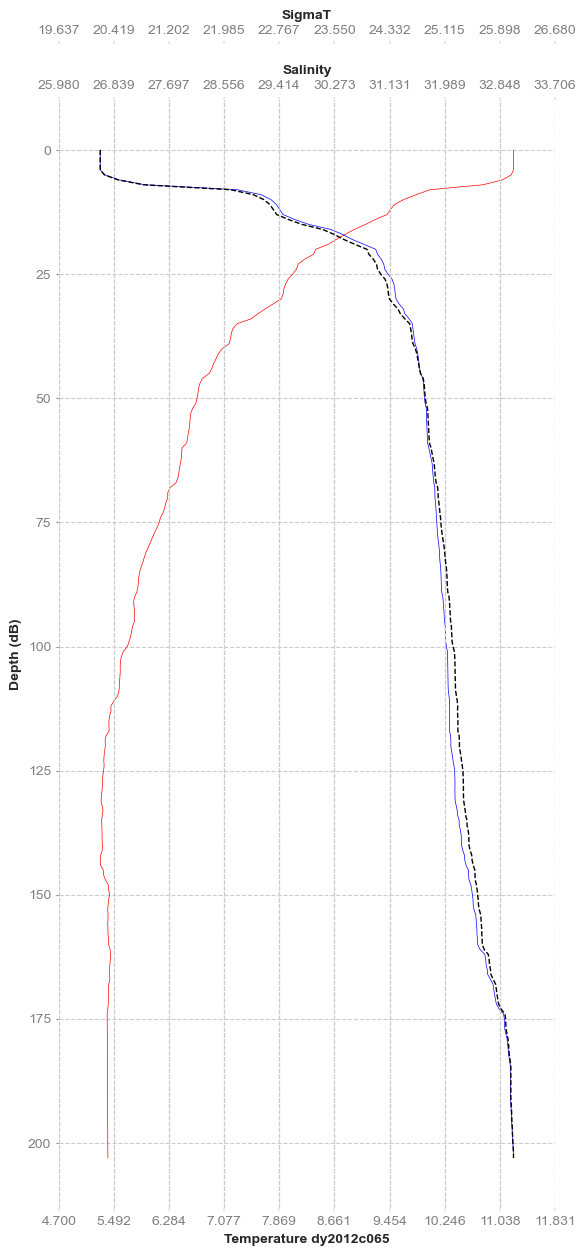

In [6]:
sbe_p = sbe_ctd_plots.CTDProfilePlot()
plt,fig =sbe_p.plot3var(varname=['temperature_ch1','temperature_ch2','salinity_ch1','salinity_ch2','sigmat_ch1','sigmat_ch2'],
                  xdata=[ctd_df['temperature_ch1'],ctd_df['temperature_ch2'],ctd_df['salinity_ch1'],ctd_df['salinity_ch2'],ctd_df['sigma_t_ch1'],ctd_df['sigma_t_ch2']],
                  ydata=ctd_df['pressure'],
                  secondary=True,
                  xlabel=['Temperature dy2012c065','Salinity','SigmaT'])

DefaultSize = fig.get_size_inches()
fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
# plt.savefig(sample_data_dir+cast.replace('.nc','_TempSalSigmaT.png'))
# plt.close(fig)

In [7]:
# batch

In [22]:
cruiseid = 'mf893a'
url = "http://ecofoci-field.pmel.noaa.gov:8080/erddap"

for count in range(1,100,1):
    
    ctd_df = erddap.erddapCTDretrieve(url=url,cruiseid=cruiseid,qclevel='final',concastno=str(count).zfill(3))
    
    if ctd_df.empty: 
        continue
        
    ctd_df.columns = [x.split(' ')[0] for x in ctd_df.columns]

    ctd_df['sigma_t_ch1'] = sw.dens0(t=ctd_df['temperature_ch1'],s=ctd_df['salinity_ch1'])-1000
    ctd_df['sigma_t_ch2'] = sw.dens0(t=ctd_df['temperature_ch2'],s=ctd_df['salinity_ch2'])-1000

    sbe_p = sbe_ctd_plots.CTDProfilePlot()
    plt,fig =sbe_p.plot3var(varname=['temperature_ch1','temperature_ch2','salinity_ch1','salinity_ch2','sigmat_ch1','sigmat_ch2'],
                      xdata=[ctd_df['temperature_ch1'],ctd_df['temperature_ch2'],ctd_df['salinity_ch1'],ctd_df['salinity_ch2'],ctd_df['sigma_t_ch1'],ctd_df['sigma_t_ch2']],
                      ydata=ctd_df['pressure'],
                      secondary=False,
                      xlabel=[f'Temperature {cruiseid}c{str(count).zfill(3)}','Salinity','SigmaT'])

    DefaultSize = fig.get_size_inches()
    fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
    plt.savefig(f'{cruiseid}c{str(count).zfill(3)}_TempSalSigmaT.png')
    plt.close(fig)